Cosine similarity between speeches of presidents

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
import nltk
nltk.download(['inaugural', 'state_union', 'wordnet'])

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Paru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Paru\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Paru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import inaugural, state_union
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
from nltk.corpus import state_union
print(state_union.fileids())

['1945-Truman.txt', '1946-Truman.txt', '1947-Truman.txt', '1948-Truman.txt', '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt', '1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt', '1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt', '1959-Eisenhower.txt', '1960-Eisenhower.txt', '1961-Kennedy.txt', '1962-Kennedy.txt', '1963-Johnson.txt', '1963-Kennedy.txt', '1964-Johnson.txt', '1965-Johnson-1.txt', '1965-Johnson-2.txt', '1966-Johnson.txt', '1967-Johnson.txt', '1968-Johnson.txt', '1969-Johnson.txt', '1970-Nixon.txt', '1971-Nixon.txt', '1972-Nixon.txt', '1973-Nixon.txt', '1974-Nixon.txt', '1975-Ford.txt', '1976-Ford.txt', '1977-Ford.txt', '1978-Carter.txt', '1979-Carter.txt', '1980-Carter.txt', '1981-Reagan.txt', '1982-Reagan.txt', '1983-Reagan.txt', '1984-Reagan.txt', '1985-Reagan.txt', '1986-Reagan.txt', '1987-Reagan.txt', '1988-Reagan.txt', '1989-Bush.txt', '1990-Bush.txt', '1991-Bush-1.txt', '1991-Bush-2.txt', '1992-Bush.txt', '1993-Clinton.txt',

In [14]:
file_ids = inaugural.fileids()  

In [15]:
speeches = [inaugural.raw(fid) for fid in file_ids]
labels = file_ids

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(speeches)

similarity_matrix = cosine_similarity(tfidf_matrix)

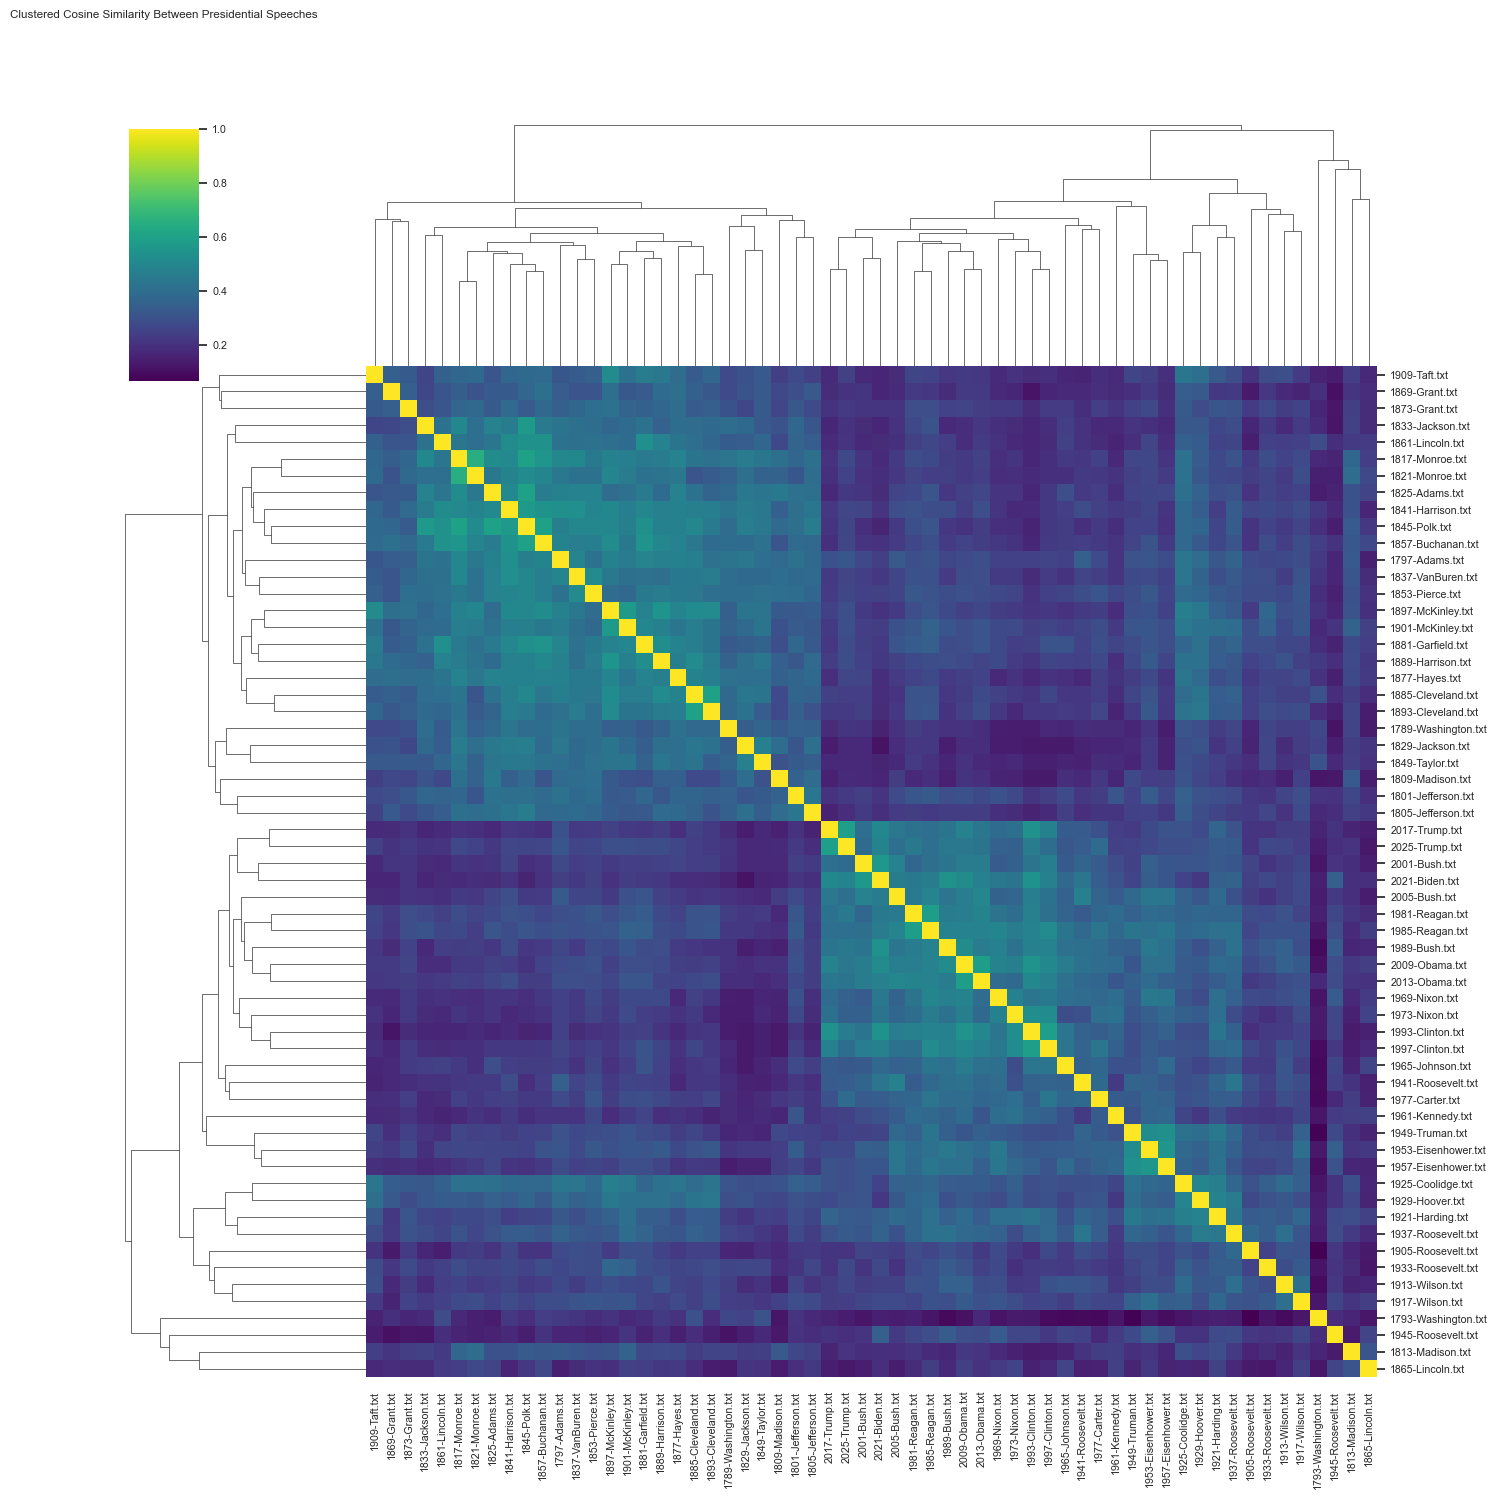

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming similarity_matrix and labels are already defined
sns.set(font_scale=0.7)  # Adjust for readability

# Create a clustered heatmap
sns.clustermap(
    similarity_matrix,
    cmap='viridis',
    figsize=(14, 14),
    row_cluster=True,
    col_cluster=True,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Clustered Cosine Similarity Between Presidential Speeches", pad=80)
plt.show()

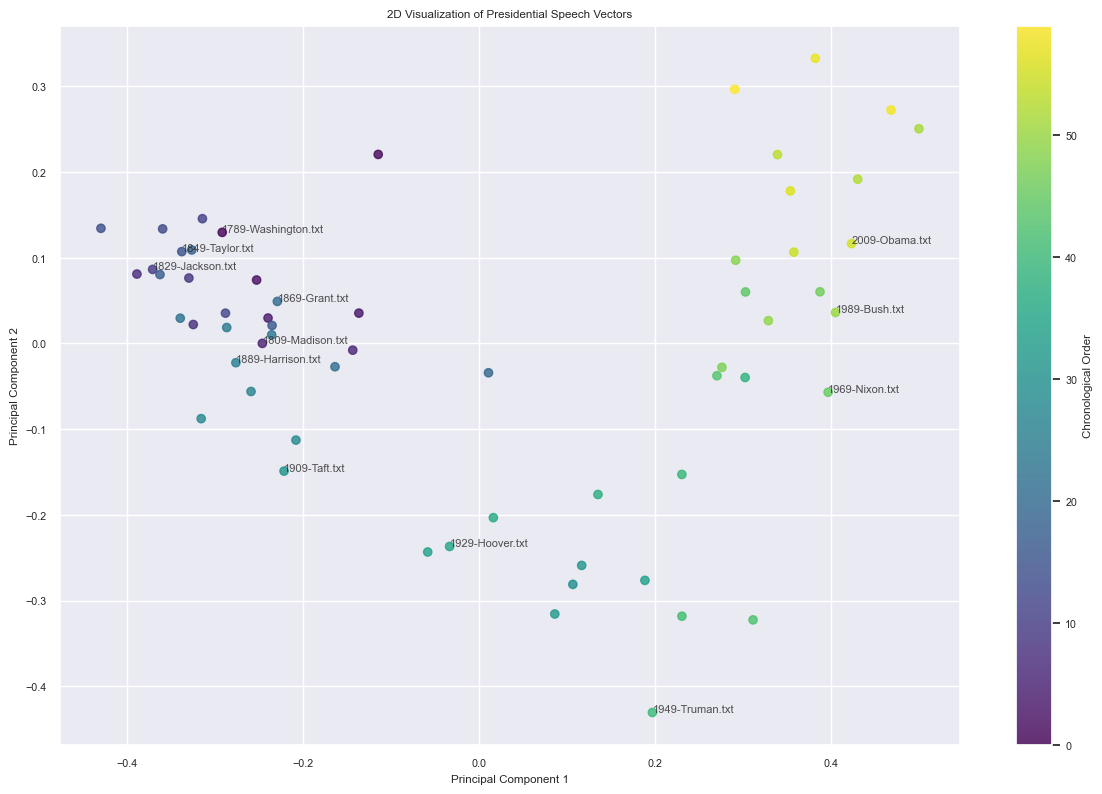

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
speech_vectors_2d = pca.fit_transform(tfidf_matrix.toarray())

# Step 4: Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    speech_vectors_2d[:, 0], 
    speech_vectors_2d[:, 1],
    c=np.arange(len(labels)),  # Color by chronological order
    cmap='viridis', 
    alpha=0.8
)

# Add labels for selected points (to avoid overcrowding)
for i, label in enumerate(labels):
    # Add labels to every 5th speech, or customize as needed
    if i % 5 == 0:
        plt.annotate(label, (speech_vectors_2d[i, 0], speech_vectors_2d[i, 1]),
                    fontsize=8, alpha=0.8)

plt.title('2D Visualization of Presidential Speech Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(scatter, label='Chronological Order')
plt.tight_layout()
plt.show()